# Sentiment Analysis on notable speeches of the last decade

This tutorial demonstrates how to build a simple <a href = 'https://en.wikipedia.org/wiki/Long_short-term_memory'> Long Short Term memory network (LSTM) </a> from scratch in NumPy to perform sentiment analysis on a socially relevant and ethically acquired dataset.

Your deep learning model (the LSTM) is a form of a Recurrent Neural Network and will learn to classify a piece of text as positive or negative from the IMDB reviews dataset. The dataset contains 50,000 movie reviews and corresponding labels. Based on the numeric representations of these reviews and their corresponding labels <a href = 'https://en.wikipedia.org/wiki/Supervised_learning'> (supervised learning) </a> the neural network will be trained to learn the sentiment using forward propagation and backpropagation through time since we are dealing with sequential data here. The output will be a vector containing the probabilities that the text samples are positive.

Today, Deep Learning is getting adopted in everyday life and now it is more important to ensure that decisions that have been taken using AI are not reflecting discriminatory behavior towards a set of populations. It is important to take fairness into consideration while consuming the output from AI. Throughout the tutorial we'll try to question all the steps in our pipeline from an ethics point of view.

## Prerequisites 

You are expected to be familiar with the Python programming language and array manipulation with NumPy. In addition, some understanding of Linear Algebra and Calculus is recommended. You should also be familiar with how Neural Networks work. For reference, you can visit the [Python](https://docs.python.org/dev/tutorial/index.html), [Linear algebra on n-dimensional arrays](https://numpy.org/doc/stable/user/tutorial-svd.html) and [Calculus](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html) tutorials.

To get a refresher on Deep Learning basics, You should consider reading [the d2l.ai book](https://d2l.ai/chapter_recurrent-neural-networks/index.html), which is an interactive deep learning book with multi-framework code, math, and discussions. You can also go through the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) to understand how a basic neural network is implemented from scratch.

In addition to NumPy, you will be utilizing the following Python standard modules for data loading and processing:
- [`pandas`](https://pandas.pydata.org/docs/) for handling dataframes 
- [`Matplotlib`](https://matplotlib.org/) for data visualization
- [`pooch`](https://www.fatiando.org/pooch/latest/https://www.fatiando.org/pooch/latest/) to download and cache datasets

This tutorial can be run locally in an isolated environment, such as [Virtualenv](https://virtualenv.pypa.io/en/stable/) or [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). You can use [Jupyter Notebook or JupyterLab](https://jupyter.org/install) to run each notebook cell.

## Table of contents

1. Data Collection 

2. Preprocess the datasets

3. Build and train a LSTM network from scratch

4. Perform sentiment analysis on collected speeches 

5. Next steps

## 1. Data Collection

Before you begin there are a few pointers you should always keep in mind before choosing the data you wish to train your model on:
- **Identifying Data Bias** - Bias is an inherent component of the human thought process. Therefore data sourced from human activities reflects that bias. Some ways in which this bias tends to occur in Machine Learning datasets are:
    - *Bias in historical data*: Historical data are often skewed towards, or against, particular groups.
        Data can also be severely imbalanced with limited information on protected groups.
    - *Bias in data collection mechanisms*: Lack of representativeness introduces inherent biases in the data collection process.  
    - *Bias towards observable outcomes*: In some scenarios, we have the information about True Outcomes only for a certain section of the population. In the absence of information on all outcomes, one cannot even measure fairness
- **Preserving human anonymity for sensitive data**: [Trevisan and Reilly](https://eprints.whiterose.ac.uk/91157/1/Ethical%20dilemmas.pdf) identified a list of sensitive topics that need to be handled with extra care. We present the same below along with a few additions:
    - personal daily routines (including location data);
    - individual details about impairment and/or medical records;
    - emotional accounts of pain and chronic illness;
    - financial information about income and/or welfare payments;
    - discrimination and abuse episodes;
    - criticism/praise of individual providers of healthcare and support services;
    - suicidal thoughts;
    - criticism/praise of a power structure especially if it compromises their safety;
    - personally-identifying information (even if anonymized in some way) including things like fingerprints or voice.

>While it can be difficult taking consent from so many people especially on on-line platforms, the necessity of it depends upon the sensitivity of the topics your data includes and other indicators like whether the platform the data was obtained from allows users to operate under pseudonyms. If the website has a policy that forces the use of a real name, then the users need to be asked for consent.

In this section, you will be collecting two different datasets: the IMDb movie reviews dataset, and a collection of 10 speeches curated for this tutorial including activists from different countries around the world, different times, and different topics. The former would be used to train the deep learning model while the latter will be used to perform sentiment analysis on.

### Collecting the IMDb reviews dataset
IMDb Reviews Dataset is a large movie review dataset collected and prepared by Andrew L. Maas from the popular movie rating service, IMDb. The IMDb Reviews dataset is used for binary sentiment classification, whether a review is positive or negative. It contains 25,000 movie reviews for training and 25,000 for testing. All these 50,000 reviews are labeled data that may be used for supervised deep learning. For ease of reproducibility, we'll be sourcing  the data from [Zenodo](https://zenodo.org/record/4117827#.YVQZ_EZBy3Ihttps://zenodo.org/record/4117827#.YVQZ_EZBy3I).
   > The IMDb platform allows the usage of their public datasets for personal and non-commercial use. We did our best to ensure that these reviews do not contain any of the aforementioned sensitive topics pertaining to the reviewer.

### Collecting and loading the speech transcripts
We have chosen speeches by activists around the globe talking about issues like climate change, feminism, lgbtqa+ rights and racism. These were sourced from newspapers, the official website of the United Nations and the archives of established universities as cited in the table below. A CSV file was created containing the transcribed speeches, their speaker and the source the speeches were obtained from. 
We made sure to include different demographics in our data and included a range of different topics, most of which focus on social and/or ethical issues. 

| Speech                                           | Speaker                 | Source                                                     |
|--------------------------------------------------|-------------------------|------------------------------------------------------------|
| Barnard College Commencement                     | Leymah Gbowee           | [Barnard College](https://barnard.edu/news/transcript-speech-nobel-peace-prize-winner-leymah-gbowee)                         |
| UN Speech on youth Education                     | Malala Yousafzai        | [The Guardian](https://www.theguardian.com/commentisfree/2013/jul/12/malala-yousafzai-united-nations-education-speech-text)                                              |
| Remarks in the UNGA on racial discrimination     | Linda Thomas Greenfield | [United States mission to the United Nation](https://usun.usmission.gov/remarks-by-ambassador-linda-thomas-greenfield-at-a-un-general-assembly-commemorative-meeting-for-intl-day-for-the-elimination-of-racial-discrimination/)                 |
| How Dare You                                     | Greta Thunberg          | [NBC](https://www.nbcnews.com/news/world/read-greta-thunberg-s-full-speech-united-nations-climate-action-n1057861)                                   |
| The speech that silenced the world for 5 minutes | Severn Suzuki           | [Earth Charter](https://earthcharter.org/new-voices-after-26-years-of-the-girl-who-silenced-the-world-for-5-minutes/)                                             |
| The Hope Speech                                  | Harvey Milk             | [Museum of Fine Arts, Boston](https://www.mfa.org/exhibitions/amalia-pica/transcript-harvey-milks-the-hope-speech)                 |
| Speech at the time to Thrive Conference          | Ellen Page              | [Huffpost](https://www.huffpost.com/entry/time-to-thrive_b_4794251)                                                  |
| I have a dream                                   | Martin Luther King      | [Marshall University](https://www.marshall.edu/onemarshallu/i-have-a-dream/)                    |

## 2. Preprocess the datasets
>Preprocessing data is an extremely crucial step before building any Deep learning model, however in an attempt to keep the tutorial focused on building the model, we will not dive deep into the code for preprocessing. Given below is a brief overview of all the steps we undertake to clean our data and convert it to its numeric representation. 

1. **Text Denoising** : Before converting your text into vectors, it is important to clean it and remove all unhelpful parts a.k.a the noise from your data by converting all characters to lowercase, removing html tags, brackets and stop words (words that don't add much meaning to a sentence). Without this step the dataset is often a cluster of words that the computer doesn't understand. 


2. **Converting words to vectors** : A word embedding is a learned representation for text where words that have the same meaning have a similar representation. Individual words are represented as real-valued vectors in a predefined vector space. GloVe is an unsupervised algorithm developed by Stanford for generating word embeddings by generating global word-word co-occurence matrix from a corpus. You can download the zipped files containing the embeddings from https://nlp.stanford.edu/projects/glove/. Here you can choose any of the four options for different sizes or training datasets. We have chosen the least memory consuming embedding file. 
 >The GloVe word embeddings include sets that were trained on billions of tokens, some up to 840 billion tokens. These algorithms exhibit stereotypical biases, such as gender bias which can be traced back to the original training data. For example certain occupations seem to be more biased towards a particular gender, reinforcing problematic stereotypes. The nearest solution to this problem are some de-biasing algorithms as the one presented in https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6835575.pdf which one can use on embeddings of their choice to mitigate bias, if present.

You'll start with importing the necessary packages to build our Deep Learning network

In [1]:
# Importing the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pooch
import string
import re 
import zipfile 
import os

In [2]:
class TextPreprocess:
    """Text Preprocessing for a Natural Language Processing model."""
    
    def txt_to_df(self, file):
        """Function to convert a txt file to pandas dataframe.

        Parameters
        ----------
        file : str
            Path to the txt file.

        Returns
        -------
        Pandas dataframe 
            txt file converted to a dataframe.

        """
        with open(imdb_train, 'r') as in_file:
            stripped = (line.strip() for line in in_file)
            reviews = {}
            for line in stripped:
                lines = [splits for splits in line.split("\t") if splits != ""]
                reviews[lines[1]] = float(lines[0])
        df = pd.DataFrame(reviews.items(), columns=['review', 'sentiment'])
        df = df.sample(frac=1).reset_index(drop=True)
        return df 
        
    def unzipper(self, zipped, to_extract):
        """Function to extract a file from a zipped folder.

        Parameters
        ----------
        zipped : str
            Path to the zipped folder.
            
        to_extract: str
            Path to the file to be extracted from the zipped folder

        Returns
        -------
        str 
            Path to the extracted file.

        """
        fh = open(zipped, 'rb')
        z = zipfile.ZipFile(fh)
        outdir = os.path.split(zipped)[0]
        z.extract(to_extract, outdir)
        fh.close()
        output_file = os.path.join(outdir, to_extract)
        return output_file

    def cleantext(self, df, text_column=None,
                  remove_stopwords=True, remove_punc=True):
        """Function to clean text data.

        Parameters
        ----------
        df : pandas dataframe
            The dataframe housing the input data.
        text_column : str
            Column in dataframe whose text is to be cleaned.
        remove_stopwords : bool
            if True, remove stopwords from text
        remove_punc : bool
            if True, remove punctuation symbols from text

        Returns
        -------
        Numpy array
            Cleaned text.

        """
        # converting all characters to lowercase
        df[text_column] = df[text_column].str.lower()

        # List of stopwords taken from https://gist.github.com/sebleier/554280
        stopwords = ["a", "about", "above", "after", "again", "against",
                     "all", "am", "an", "and", "any", "are",
                     "as", "at", "be", "because",
                     "been", "before", "being", "below",
                     "between", "both", "but", "by", "could",
                     "did", "do", "does", "doing", "down", "during",
                     "each", "few", "for", "from", "further",
                     "had", "has", "have", "having", "he",
                     "he'd", "he'll", "he's", "her", "here",
                     "here's", "hers", "herself", "him",
                     "himself", "his", "how", "how's", "i",
                     "i'd", "i'll", "i'm", "i've",
                     "if", "in", "into",
                     "is", "it", "it's", "its",
                     "itself", "let's", "me", "more",
                     "most", "my", "myself", "nor", "of",
                     "on", "once", "only", "or",
                     "other", "ought", "our", "ours",
                     "ourselves", "out", "over", "own", "same",
                     "she", "she'd", "she'll", "she's", "should",
                     "so", "some", "such", "than", "that",
                     "that's", "the", "their", "theirs", "them",
                     "themselves", "then", "there", "there's",
                     "these", "they", "they'd", "they'll",
                     "they're", "they've", "this", "those",
                     "through", "to", "too", "under", "until", "up",
                     "very", "was", "we", "we'd", "we'll",
                     "we're", "we've", "were", "what",
                     "what's", "when", "when's",
                     "where", "where's",
                     "which", "while", "who", "who's",
                     "whom", "why", "why's", "with",
                     "would", "you", "you'd", "you'll",
                     "you're", "you've",
                     "your", "yours", "yourself", "yourselves"]

        def remove_stopwords(data, column):
            data[f'{column} without stopwords'] = data[column].apply(
                lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
            return data

        def remove_tags(string):
            result = re.sub('<*>', '', string)
            return result

        # remove html tags and brackets from text
        if remove_stopwords:
            data_without_stopwords = remove_stopwords(df, text_column)
            data_without_stopwords[f'clean_{text_column}'] = data_without_stopwords[f'{text_column} without stopwords'].apply(
                lambda cw: remove_tags(cw))
        if remove_punc:
            data_without_stopwords[f'clean_{text_column}'] = data_without_stopwords[f'clean_{text_column}'].str.replace(
                '[{}]'.format(string.punctuation), ' ', regex=True)

        X = data_without_stopwords[f'clean_{text_column}'].to_numpy()

        return X


    def sent_tokeniser(self, x):
        """Function to split text into sentences.

        Parameters
        ----------
        x : str
            piece of text

        Returns
        -------
        list 
            sentences with punctuation removed.

        """
        sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', x)
        sentences.pop()
        sentences_cleaned = [re.sub(r'[^\w\s]', '', x) for x in sentences]
        return sentences_cleaned

    def word_tokeniser(self, text):
        """Function to split text into tokens.

        Parameters
        ----------
        x : str
            piece of text

        Returns
        -------
        list
            words with punctuation removed.

        """
        tokens = re.split(r"([-\s.,;!?])+", text)
        words = [x for x in tokens if (
            x not in '- \t\n.,;!?\\' and '\\' not in x)]
        return words

    def loadGloveModel(self, emb_path):
        """Function to read from the word embedding file.

        Returns
        -------
        Dict 
            mapping from word to corresponding word embedding.

        """
        print("Loading Glove Model")
        File = emb_path
        f = open(File, 'r')
        gloveModel = {}
        for line in f:
            splitLines = line.split()
            word = splitLines[0]
            wordEmbedding = np.array([float(value) for value in splitLines[1:]])
            gloveModel[word] = wordEmbedding
        print(len(gloveModel), " words loaded!")
        return gloveModel

    def text_to_paras(self, text, para_len):
        """Function to split text into paragraphs.

        Parameters
        ----------
        text : str
            piece of text

        para_len : int
            length of each paragraph

        Returns
        -------
        list 
            paragraphs of specified length.

        """
        # split the speech into a list of words
        words = text.split()
        # obtain the total number of paragraphs
        no_paras = int(np.ceil(len(words)/para_len))
        # split the speech into a list of sentences
        sentences = self.sent_tokeniser(text)
        # aggregate the sentences into paragraphs
        k, m = divmod(len(sentences), no_paras)
        agg_sentences = [sentences[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(no_paras)]
        paras = np.array([' '.join(sents) for sents in agg_sentences])

        return paras

[Pooch](https://github.com/fatiando/pooch) is a Python package made by scientists that manages downloading data files over HTTP and storing them in a local directory. We use this to set up a download manager which contains all of the information needed to fetch the data files in our registry and store them in the specified cache folder.

In [3]:
data = pooch.create(
    # folder where the data will be stored in the 
    # default cache folder of your Operating System 
    path=pooch.os_cache("numpy-nlp-tutorial"),
    # Base URL of the remote data store
    base_url="",
    # The cache file registry. A dictionary with all files managed by this pooch.
    # The keys are the file names and values are their respective hash codes which
    # ensure we download the same, uncorrupted file each time. 
    registry={
        "imdb_train.txt": "6a38ea6ab5e1902cc03f6b9294ceea5e8ab985af991f35bcabd301a08ea5b3f0",
         "imdb_test.txt": "7363ef08ad996bf4233b115008d6d7f9814b7cc0f4d13ab570b938701eadefeb",
        "glove.6B.50d.zip": "617afb2fe6cbd085c235baf7a465b96f4112bd7f7ccb2b2cbd649fed9cbcf2fb",
    },
    # Now specify custom URLs for some of the files in the registry.
    urls={
        "imdb_train.txt": "doi:10.5281/zenodo.4117827/imdb_train.txt",
        "imdb_test.txt": "doi:10.5281/zenodo.4117827/imdb_test.txt",
        "glove.6B.50d.zip": 'https://nlp.stanford.edu/data/glove.6B.zip'
    }
)

Download the IMDb training and testing data files:

In [4]:
imdb_train = data.fetch('imdb_train.txt')
imdb_test = data.fetch('imdb_test.txt')

Instantiate the` TextPreprocess` class to perform various operations on our datasets:

In [5]:
textproc = TextPreprocess()

Convert each IMDb file to a `pandas` dataframe for a more convenient preprocessing of the datasets:

In [6]:
train_df = textproc.txt_to_df(imdb_train)
test_df = textproc.txt_to_df(imdb_test)

Now, you will clean the dataframes obtained above by removing occurrences of stopwords and punctuation marks. You will also retrieve the sentiment values from each dataframe to obtain the target variables:

In [7]:
X_train = textproc.cleantext(train_df,
                       text_column='review',
                       remove_stopwords=True,
                       remove_punc=True)[0:2000]

X_test = textproc.cleantext(test_df,
                       text_column='review',
                       remove_stopwords=True,
                       remove_punc=True)[0:1000]

y_train = train_df['sentiment'].to_numpy()[0:2000]
y_test = test_df['sentiment'].to_numpy()[0:1000]

The same process is applicable on the collected speeches:
> Since we will be performing paragraph wise sentiment analysis on each speech further ahead in the tutorial, we'll need the punctuation marks to split the text into paragraphs, hence we refrain from removing their punctuation marks at this stage

In [8]:
speech_data_path = 'tutorial-nlp-from-scratch/speeches.csv'
speech_df = pd.read_csv(speech_data_path)
X_pred = textproc.cleantext(speech_df,
                            text_column='speech',
                            remove_stopwords=True,
                            remove_punc=False)
speakers = speech_df['speaker'].to_numpy()

You will now download the `GloVe` embeddings, unzip them and build a dictionary mapping each word and word embedding. This will act as a cache for when you need to replace each word with its respective word embedding.

In [9]:
glove = data.fetch('glove.6B.50d.zip')
emb_path = textproc.unzipper(glove, 'glove.6B.300d.txt')
emb_matrix = textproc.loadGloveModel(emb_path)

Loading Glove Model
400000  words loaded!


### 3. Build the Deep Learning Model¶
 It is time to start implementing our LSTM! You will have to first familiarize yourself with some high-level concepts of the basic building blocks of a deep learning model. You can refer to the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) for the same. 

You will then learn how a Recurrent Neural Network differs from a plain Neural Network and what makes it so suitable for processing sequential data. Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to classify the sentiment of a piece of text as positive or negative with a certain level of accuracy

### Introduction to a Long Short Term Memory Network

In a [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP), the information only moves in one direction — from the input layer, through the hidden layers, to the output layer. The information moves straight through the network and never takes the previous nodes into account at a later stage. Because it only considers the current input, the features learned are not shared across different positions of the sequence. Moreover, it cannot process sequences with varying lengths.

Unlike an MLP, the RNN was designed to work with sequence prediction problems.RNNs introduce state variables to store past information, together with the current inputs, to determine the current outputs. Since an RNN shares the learned features with all the data points in a sequence regardless of its length, it is capable of processing sequences with varying lengths.  

The problem with an RNN however, is that it cannot retain long-term memory because the influence of a given input on the hidden layer, and therefore on the network output, either decays or blows up exponentially as it cycles around the network’s recurrent connections. This shortcoming is referred to as the vanishing gradient problem. Long Short-Term Memory (LSTM) is an RNN architecture specifically designed to address the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

### Overview of the Model Architecture 

<img src="_static/lstm.gif" width="900" align="center">

In the above gif, The rectangles labeled $A$ are called `Cells` and they are the **Memory Blocks** of our LSTM network. They are responsible for choosing what to remember in a sequence and pass on that information to the next cell via two states called the `hidden state` $H_{t}$ and the `cell state` $C_{t}$ where $t$ indicates the time-step. Each `Cell` has dedicated gates which are responsible for storing, writing or reading the information passed to an LSTM. You will now look closely at the architecture of the network by implementing each mechanism happening inside of it. 

Lets start with writing a function to randomly initialize the parameters which will be learned while our model trains

In [10]:
def initialise_params(hidden_dim, input_dim):
    # forget gate
    Wf = np.random.randn(hidden_dim, hidden_dim + input_dim)
    bf = np.random.randn(hidden_dim, 1)
    # input gate
    Wi = np.random.randn(hidden_dim, hidden_dim + input_dim)
    bi = np.random.randn(hidden_dim, 1)
    # candidate memory gate
    Wcm = np.random.randn(hidden_dim, hidden_dim + input_dim)
    bcm = np.random.randn(hidden_dim, 1)
    # output gate
    Wo = np.random.randn(hidden_dim, hidden_dim + input_dim)
    bo = np.random.randn(hidden_dim, 1)

    # fully connected layer for classification
    W2 = np.random.randn(1, hidden_dim)
    b2 = np.zeros((1, 1))

    parameters = {
        "Wf": Wf,
        "bf": bf,
        "Wi": Wi,
        "bi": bi,
        "Wcm": Wcm,
        "bcm": bcm,
        "Wo": Wo,
        "bo": bo,
        "W2": W2,
        "b2": b2
    }
    return parameters

### Forward Propagation

Now that you have your initialized parameters, you can pass the input data in a forward direction through the network. Each layer accepts the input data, processes it and passes it to the successive layer. This process is called `Forward Propagation`. You will undertake the following mechanism to implement it:
- Loading the word embeddings of the input data
- Passing the embeddings to an LSTM
- Perform all the gate mechanisms in every memory block of the LSTM to obtain the final hidden state 
- Passing the final hidden state through a fully connected layer to obtain the probability with which the sequence is positive 
- Storing all the calculated values in a cache to utilize during backpropagation

[Sigmoid](https://d2l.ai/chapter_multilayer-perceptrons/mlp.html?highlight=sigmoid#sigmoid-function) belongs to the family of non-linear activation functions. It helps the network to update or forget the data. If the sigmoid of a value results in 0, the information is considered forgotten. Similarly, the information stays if it is 1.

In [11]:
def sigmoid(x):
    n = np.exp(np.fmin(x, 0))
    d = (1 + np.exp(-np.abs(x)))
    return n / d

The **Forget Gate** takes the current word embedding and the previous hidden state concatenated together as input. and decides what parts of the old memory cell content need attention and which can be ignored.

In [12]:
def fp_forget_gate(concat, parameters):
    ft = sigmoid(np.dot(parameters['Wf'], concat)
                 + parameters['bf'])
    return ft  

The **Input Gate** takes the current word embedding and the previous hidden state concatenated together as input. and governs how much of the new data we take into account via the **Candidate Memory Gate** which utilizes the [Tanh](https://d2l.ai/chapter_multilayer-perceptrons/mlp.html?highlight=tanh#tanh-function) to regulate the values flowing through the network.

In [13]:
def fp_input_gate(concat, parameters):
    it = sigmoid(np.dot(parameters['Wi'], concat)
                 + parameters['bi'])
    cmt = np.tanh(np.dot(parameters['Wcm'], concat)
                  + parameters['bcm'])
    return it, cmt 

Finally we have the **Output Gate** which takes information from the current word embedding, previous hidden state and the cell state which has been updated with information from the forget and input gates to update the value of the hidden state.

In [14]:
def fp_output_gate(concat, next_cs, parameters):
    ot = sigmoid(np.dot(parameters['Wo'], concat)
                 + parameters['bo'])
    next_hs = ot * np.tanh(next_cs)
    return ot, next_hs

The following image summarizes each gate mechanism in the memory block of a LSTM network:
>Image has been modified from [this](https://link.springer.com/chapter/10.1007%2F978-3-030-14524-8_11) source

<img src="_static/mem_block.png" width="800" align="center">

### But how do you obtain sentiment from the LSTM's output?
The hidden state you obtain from the output gate of the last memory block in a sequence is considered to be a representation of all the information contained in a sequence. To classify this information into various classes (2 in our case, positive and negative) we use a **Fully Connected layer** which firstly maps this information to a predefined output size (1 in our case). Then, an activation function such as the sigmoid converts this output to a value between 0 and 1. We'll consider values greater than 0.5 to be indicative of a positive sentiment.

In [15]:
def fp_fc_layer(last_hs, parameters):
    z2 = (np.dot(parameters['W2'], last_hs)
          + parameters['b2'])
    a2 = sigmoid(z2)
    return a2 

Now you will put all these functions together to summarize the **Forward Propagation** step in our model architecture:

In [16]:
def forward_prop(X_vec, parameters, input_dim):

    hidden_dim = parameters['Wf'].shape[0]
    time_steps = len(X_vec)

    # Initialise hidden and cell state before passing to first time step
    prev_hs = np.zeros((hidden_dim, 1))
    prev_cs = np.zeros(prev_hs.shape)

    # Store all the intermediate and final values here
    caches = {'lstm_values': [], 'fc_values': []}

    # Hidden state from the last cell in the LSTM layer is calculated.
    for t in range(time_steps):
        # Retrieve word corresponding to current time step
        x = X_vec[t]
        # Retrieve the embedding for the word and reshape it to make the LSTM happy
        xt = emb_matrix.get(x, np.random.rand(input_dim, 1))
        xt = xt.reshape((input_dim, 1))

        # Input to the gates is concatenated previous hidden state and current word embedding
        concat = np.vstack((prev_hs, xt))
 
        # Calculate output of the forget gate
        ft = fp_forget_gate(concat, parameters)

        # Calculate output of the input gate
        it, cmt = fp_input_gate(concat, parameters)
        io = it * cmt   
        
        # Update the cell state 
        next_cs = (ft * prev_cs) + io
        
        # Calculate output of the output gate
        ot, next_hs = fp_output_gate(concat, next_cs, parameters)

        # store all the values used and calculated by
        # the LSTM in a cache for backward propagation. 
        lstm_cache = {
        "next_hs": next_hs,
        "next_cs": next_cs,
        "prev_hs": prev_hs,
        "prev_cs": prev_cs,
        "ft": ft,
        "it" : it,
        "cmt": cmt,
        "ot": ot,
        "xt": xt,
        }
        caches['lstm_values'].append(lstm_cache)

        # Pass the updated hidden state and cell state to the next time step
        prev_hs = next_hs
        prev_cs = next_cs

    # Pass the LSTM output through a fully connected layer to 
    # obtain probability of the sequence being positive 
    a2 = fp_fc_layer(next_hs, parameters)

    # store all the values used and calculated by the
    # fully connected layer in a cache for backward propagation. 
    fc_cache = {
    "a2" : a2,
    "W2" : parameters['W2']
    }
    caches['fc_values'].append(fc_cache)
    return caches

### Backpropagation

After each forward pass through the network, you will implement the `backpropagation through time` algorithm to accumulate gradients of each parameter over the time steps. Backpropagation through a LSTM is not as straightforward as through other common Deep Learning architectures, due to the special way its underlying layers interact. Nonetheless, the approach is largely the same; identifying dependencies and applying the chain rule.

Lets start with defining a function to initialize gradients of each parameter as arrays made up of zeros with same dimensions as the corresponding parameter

In [17]:
# Initialise the gradients
def initialize_grads(parameters):
    grads = {}
    for param in parameters.keys():
        grads[f'd{param}'] = np.zeros((parameters[param].shape))
    return grads

Now, for each gate and the fully connected layer, we define a function to calculate the gradient of the loss with respect to the input passed and the parameters used. To understand the mathematics behind how the derivatives were calculated we suggest you to follow this helpful [blog](https://christinakouridi.blog/2019/06/19/backpropagation-lstm/) by Christina Kouridi

Define a function to calculate the gradients in the **Forget Gate**:

In [18]:
def bp_forget_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters):
    # dft = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dft
    dft = ((dc_prev * cache["prev_cs"] + cache["ot"]
           * (1 - np.square(np.tanh(cache["next_cs"])))
           * cache["prev_cs"] * dh_prev) * cache["ft"] * (1 - cache["ft"]))
    # dWf = dft * dft/dWf
    gradients['dWf'] += np.dot(dft, concat.T)
    # dbf = dft * dft/dbf
    gradients['dbf'] += np.sum(dft, axis=1, keepdims=True)
    # dh_f = dft * dft/dh_prev
    dh_f = np.dot(parameters["Wf"][:, :hidden_dim].T, dft)
    return dh_f, gradients 

Define a function to calculate the gradients in the **Input Gate** and **Candidate Memory Gate**:

In [19]:
def bp_input_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters):
    # dit = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dit
    dit = ((dc_prev * cache["cmt"] + cache["ot"]
           * (1 - np.square(np.tanh(cache["next_cs"])))
           * cache["cmt"] * dh_prev) * cache["it"] * (1 - cache["it"]))
    # dcmt = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dcmt
    dcmt = ((dc_prev * cache["it"] + cache["ot"]
            * (1 - np.square(np.tanh(cache["next_cs"])))
            * cache["it"] * dh_prev) * (1 - np.square(cache["cmt"])))
    # dWi = dit * dit/dWi
    gradients['dWi'] += np.dot(dit, concat.T)
    # dWcm = dcmt * dcmt/dWcm
    gradients['dWcm'] += np.dot(dcmt, concat.T)
    # dbi = dit * dit/dbi
    gradients['dbi'] += np.sum(dit, axis=1, keepdims=True)
    # dWcm = dcmt * dcmt/dbcm
    gradients['dbcm'] += np.sum(dcmt, axis=1, keepdims=True)
    # dhi = dit * dit/dh_prev
    dh_i = np.dot(parameters["Wi"][:, :hidden_dim].T, dit)
    # dhcm = dcmt * dcmt/dh_prev
    dh_cm = np.dot(parameters["Wcm"][:, :hidden_dim].T, dcmt)
    return dh_i, dh_cm, gradients 

Define a function to calculate the gradients for the **Output Gate**:

In [20]:
def bp_output_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters):
    # dot = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dot
    dot = (dh_prev * np.tanh(cache["next_cs"])
           * cache["ot"] * (1 - cache["ot"]))
    # dWo = dot * dot/dWo
    gradients['dWo'] += np.dot(dot, concat.T)
    # dbo = dot * dot/dbo
    gradients['dbo'] += np.sum(dot, axis=1, keepdims=True)
    # dho = dot * dot/dho
    dh_o = np.dot(parameters["Wo"][:, :hidden_dim].T, dot)
    return dh_o, gradients  

Define a function to calculate the gradients for the **Fully Connected Layer**:

In [21]:
def bp_fc_layer (target, caches, gradients):
    # dZ2 = dL/da2 * da2/dZ2
    predicted = np.array(caches['fc_values'][0]['a2'])
    target = np.array(target)
    dZ2 = predicted - target
    # dW2 = dL/da2 * da2/dZ2 * dZ2/dW2
    last_hs = caches['lstm_values'][-1]["next_hs"]
    gradients['dW2'] = np.dot(dZ2, last_hs.T)
    # db2 = dL/da2 * da2/dZ2 * dZ2/db2
    gradients['db2'] = np.sum(dZ2)
    # dh_last = dZ2 * W2
    W2 = caches['fc_values'][0]["W2"]
    dh_last = np.dot(W2.T, dZ2)
    return dh_last, gradients    

Put all these functions together to summarize the **Backpropagation** step for our model:

In [22]:
def backprop(y, caches, hidden_dim, input_dim, time_steps, parameters):
    
    # Initialize gradients
    gradients = initialize_grads(parameters)

    # Calculate gradients for the fully connected layer
    dh_last, gradients = bp_fc_layer(target, caches, gradients)

    # Initialize gradients w.r.t previous hidden state and previous cell state
    dh_prev = dh_last
    dc_prev = np.zeros((dh_prev.shape))

    # loop back over the whole sequence
    for t in reversed(range(time_steps)):
        cache = caches['lstm_values'][t]
        
        # Input to the gates is concatenated previous hidden state and current word embedding
        concat = np.concatenate((cache["prev_hs"], cache["xt"]), axis=0)

        # Compute gates related derivatives
        # Calculate derivative w.r.t the input and parameters of forget gate
        dh_f, gradients = bp_forget_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters)

        # Calculate derivative w.r.t the input and parameters of input gate
        dh_i, dh_cm, gradients = bp_input_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters)

        # Calculate derivative w.r.t the input and parameters of output gate
        dh_o, gradients = bp_output_gate(hidden_dim, concat, dh_prev, dc_prev, cache, gradients, parameters)

        # Compute derivatives w.r.t prev. hidden state and the prev. cell state
        dh_prev = dh_f + dh_i + dh_cm + dh_o
        dc_prev = (dc_prev * cache["ft"] + cache["ot"]
                   * (1 - np.square(np.tanh(cache["next_cs"])))
                   * cache["ft"] * dh_prev)

    return gradients

### Updating the Parameters 

We update the parameters through an optimization algorithm called [Adam](https://optimization.cbe.cornell.edu/index.php?title=Adam) which is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters `beta1` and `beta2` control the decay rates of these moving averages. Adam has shown increased convergence and robustness over other gradient descent algorithms and is often recommended as the default optimizer for training.

Define a function to initialise the moving averages for each parameter

In [23]:
# initialise the moving averages
def initialise_mav(hidden_dim, input_dim, params):
    v = {}
    s = {}
    # Initialize dictionaries v, s
    for key in params:
        v['d' + key] = np.zeros(params[key].shape)
        s['d' + key] = np.zeros(params[key].shape)
    # Return initialised moving averages
    return v, s

Define a function to update the parameters

In [24]:
# Update the parameters using Adam optimization
def update_parameters(parameters, gradients, v, s,
                      learning_rate=0.01, beta1=0.9, beta2=0.999):
    for key in parameters:
        # Moving average of the gradients
        v['d' + key] = (beta1 * v['d' + key]
                        + (1 - beta1) * gradients['d' + key])

        # Moving average of the squared gradients
        s['d' + key] = (beta2 * s['d' + key]
                        + (1 - beta2) * (gradients['d' + key] ** 2))

        # Update parameters
        parameters[key] = (parameters[key] - learning_rate
                           * v['d' + key] / np.sqrt(s['d' + key] + 1e-8))
    # Return updated parameters and moving averages
    return parameters, v, s

### Training the Network

You will start by initializing all the parameters and hyperparameters being used in your network

In [25]:
hidden_dim = 64
input_dim = emb_matrix['memory'].shape[0]
learning_rate = 0.001
epochs = 10
parameters = initialise_params(hidden_dim,
                               input_dim)
v, s = initialise_mav(hidden_dim,
                      input_dim,
                      parameters)

To optimize your deep learning network, you need to calculate a loss based on how well the model is doing on the training data. Loss value implies how poorly or well a model behaves after each iteration of optimization. <br>
Define a function to calculate the loss using [negative log likelihood](http://d2l.ai/chapter_linear-networks/softmax-regression.html?highlight=negative%20log%20likelihood#log-likelihood)

In [26]:
def loss_f(A, Y):
    # define value of epsilon to prevent zero division error inside a log
    epsilon = 1e-5
    # Implement formula for negative log likelihood
    loss = (- Y * np.log(A + epsilon)
            - (1 - Y) * np.log(1 - A + epsilon))
    # Return loss
    return np.squeeze(loss)

Set up the neural network's learning experiment with a training loop and start the training process. You will also evaluate the model's performance on the training dataset to see how well the model is *learning* and the testing dataset to see how well it is *generalizing*.
>Skip running this cell if you already have the trained parameters stored in a `npy` file

In [27]:
# To store training losses
training_losses = []
# To store testing losses
testing_losses = []

# This is a training loop.
# Run the learning experiment for a defined number of epochs (iterations).
for epoch in range(epochs):
    #################
    # Training step #
    #################
    train_j = []
    for sample, target in zip(X_train, y_train):
        # split text sample into words/tokens
        b = textproc.word_tokeniser(sample)

        # Forward propagation/forward pass:
        caches = forward_prop(b,
                              parameters,
                              input_dim)

        # Backward propagation/backward pass:
        gradients = backprop(target,
                             caches,
                             hidden_dim,
                             input_dim,
                             len(b),
                             parameters)

        # Update the weights and biases for the LSTM and fully connected layer
        parameters, v, s = update_parameters(parameters,
                                             gradients,
                                             v,
                                             s,
                                             learning_rate=learning_rate,
                                             beta1=0.999,
                                             beta2=0.9)

        # Measure the training error (loss function) between the actual
        # sentiment (the truth) and the prediction by the model.
        y_pred = caches['fc_values'][0]['a2'][0][0]
        loss = loss_f(y_pred, target)
        # Store training set losses
        train_j.append(loss)

    ###################
    # Evaluation step #
    ###################
    test_j = []
    for sample, target in zip(X_test, y_test):
        # split text sample into words/tokens
        b = textproc.word_tokeniser(sample)

        # Forward propagation/forward pass:
        caches = forward_prop(b,
                              parameters,
                              input_dim)

        # Measure the testing error (loss function) between the actual
        # sentiment (the truth) and the prediction by the model.
        y_pred = caches['fc_values'][0]['a2'][0][0]
        loss = loss_f(y_pred, target)

        # Store testing set losses
        test_j.append(loss)

    # Calculate average of training and testing losses for one epoch
    mean_train_cost = np.mean(train_j)
    mean_test_cost = np.mean(test_j)
    training_losses.append(mean_train_cost)
    testing_losses.append(mean_test_cost)
    print('Epoch {} finished. \t  Training Loss : {} \t  Testing Loss : {}'.
          format(epoch + 1, mean_train_cost, mean_test_cost))

# save the trained parameters to a npy file
np.save('tutorial-nlp-from-scratch/parameters.npy', parameters)

Epoch 1 finished. 	  Training Loss : 1.4209954855737617 	  Testing Loss : 1.4180504128162832
Epoch 2 finished. 	  Training Loss : 1.3209218866610777 	  Testing Loss : 1.4286668757659167
Epoch 3 finished. 	  Training Loss : 1.2458438359231527 	  Testing Loss : 1.354061509708878
Epoch 4 finished. 	  Training Loss : 1.130781616462501 	  Testing Loss : 1.1332645379964301
Epoch 5 finished. 	  Training Loss : 0.9688710069058838 	  Testing Loss : 0.8575375314984732
Epoch 6 finished. 	  Training Loss : 0.8198809925075743 	  Testing Loss : 0.7989606691925635
Epoch 7 finished. 	  Training Loss : 0.7950638689439468 	  Testing Loss : 0.7830338713818251
Epoch 8 finished. 	  Training Loss : 0.8235027398683119 	  Testing Loss : 0.8767868128820377
Epoch 9 finished. 	  Training Loss : 0.8620775561810344 	  Testing Loss : 0.7583397136777333
Epoch 10 finished. 	  Training Loss : 0.7643243019868933 	  Testing Loss : 0.7543967747156503


It is a good practice to plot the training and testing losses as the learning curves are often helpful in diagnosing the behavior of a Machine Learning model.

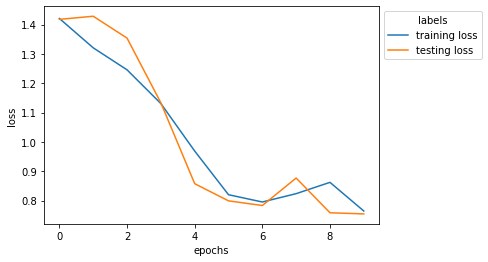

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the training loss
ax.plot(range(0, len(training_losses)), training_losses, label='training loss')
# plot the testing loss
ax.plot(range(0, len(testing_losses)), testing_losses, label='testing loss')

# set the x and y labels
ax.set_xlabel("epochs")
ax.set_ylabel("loss")

plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

### Sentiment Analysis on the Speech Data

Once your model is trained, you can use the updated parameters to start making our predictions. You can break each speech into paragraphs of uniform size before passing them to the Deep Learning model and predicting the sentiment of each paragraph

In [30]:
# To store predicted sentiments
predictions = {}

# define the length of a paragraph
para_len = 100

# Retrieve trained values of the parameters
if os.path.isfile('tutorial-nlp-from-scratch/parameters.npy'):
    parameters = np.load('tutorial-nlp-from-scratch/parameters.npy', allow_pickle=True).item()

# This is the prediction loop.
for index, text in enumerate(X_pred):
    # split each speech into paragraphs
    paras = textproc.text_to_paras(text, para_len)
    # To store the network outputs
    preds = []

    for para in paras:
        # split text sample into words/tokens
        para_tokens = textproc.word_tokeniser(para)
        # Forward Propagation
        caches = forward_prop(para_tokens,
                              parameters,
                              input_dim)

        # Retrieve the output of the fully connected layer
        sent_prob = caches['fc_values'][0]['a2'][0][0]
        preds.append(sent_prob)

    threshold = 0.5
    preds = np.array(preds)
    # Mark all predictions > threshold as positive and < threshold as negative
    pos_indices = np.where(preds > threshold)  # indices where output > 0.5
    neg_indices = np.where(preds < threshold)  # indices where output < 0.5
    # Store predictions and corresponding piece of text
    predictions[speakers[index]] = {'pos_paras': paras[pos_indices[0]],
                                    'neg_paras': paras[neg_indices[0]]}

Visualizing the sentiment predictions:

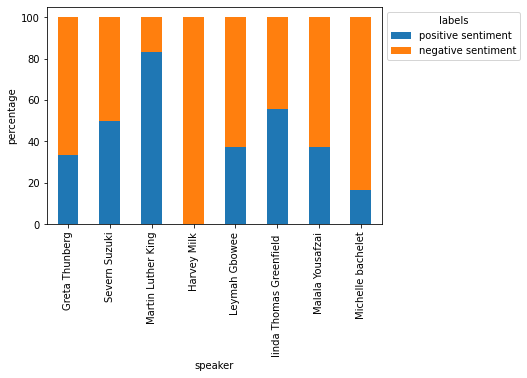

In [31]:
x_axis = []
data = {'positive sentiment': [], 'negative sentiment': []}
for speaker in predictions:
    # The speakers will be used to label the x-axis in our plot
    x_axis.append(speaker)
    # number of paras with positive sentiment
    no_pos_paras = len(predictions[speaker]['pos_paras'])
    # number of paras with negative sentiment
    no_neg_paras = len(predictions[speaker]['neg_paras'])
    # Obtain percentage of paragraphs with positive predicted sentiment
    pos_perc = no_pos_paras / (no_pos_paras + no_neg_paras)
    # Store positive and negative percentages
    data['positive sentiment'].append(pos_perc*100)
    data['negative sentiment'].append(100*(1-pos_perc))

index = pd.Index(x_axis, name='speaker')
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True)
ax.set_ylabel('percentage')
ax.legend(title='labels', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In the plot above, you're shown what percentages of each speech are expected to carry a positive and negative  sentiment. Since this implementation prioritized simplicity and clarity over performance, we cannot expect these results to be very accurate. Moreover, while making the sentiment predictions for one paragraph we did not use the neighboring paragraphs for context which would have led to more accurate predictions. We encourage the reader to play around with the model and make some tweaks suggested in `Next Steps` and observe how the model performance changes.

### Looking at our Neural Network from an ethical perspective

It's crucial to understand that accurately identifying a text's sentiment is not easy primarily because of the complex ways in which humans express sentiment, using irony, sarcasm, humor, or, in social media, abbreviation. Moreover neatly placing text into two categories: 'positive' and 'negative' can be problematic because it is being done without any context. Words or abbreviations can convey very different sentiments depending on age and location, none of which we took into account while building our model.

Along with data, there are also growing concerns that data processing algorithms are influencing policy and daily lives in ways that are not transparent and introduce biases. Certain biases such as the [Inductive Bias](https://bit.ly/2WtTKIe) are essential to help a Machine Learning model generalize better, for example the LSTM we built earlier is biased towards preserving contextual information over long sequences which makes it so suitable for processing sequential data. The problem arises when [societal biases](https://hbr.org/2019/10/what-do-we-do-about-the-biases-in-ai) creep into algorithmic predictions. Optimizing Machine algorithms via methods like [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization) can then further amplify these biases by learning every bit of information in the data. 


There are also cases where bias is only in the output and not the inputs (data, algorithm). For example, in sentiment analysis [accuracy tends to be higher on female-authored texts than on male-authored ones]( https://doi.org/10.3390/electronics9020374). End users of sentiment analysis should be aware that its small gender biases can affect the conclusions drawn from it and apply correction factors when necessary. Hence, it is important that demands for algorithmic accountability should include the ability to test the outputs of a system, including the ability to drill down into different user groups by gender, ethnicity and other characteristics, to identify, and hopefully suggest corrections for, system output biases.

### Next Steps

You have learned how to build and train a simple Long Short Term Memory network from scratch using just NumPy to perform sentiment analysis.

To further enhance and optimize your neural network model, you can consider one of a mixture of the following:

- Alter the architecture by introducing multiple LSTM layers to make the network deeper.
- Use a higher epoch size to train longer and add more regularization techniques, such as early stopping, to prevent overfitting.
- Introduce a validation set for an unbiased evaluation of the model fit.
- Apply batch normalization for faster and more stable training.
- Tune other parameters, such as the learning rate and hidden layer size.
- Initialize weights using [Xavier Initialization](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html#xavier-initialization) to prevent vanishing/exploding gradients instead of initializing them randomly.
- Replace LSTM with a [Bidirectional LSTM](https://en.wikipedia.org/wiki/Bidirectional_recurrent_neural_networks) to use both left and right context for predicting sentiment.

Nowadays, LSTMs have been replaced by the [Transformer](https://jalammar.github.io/illustrated-transformer/)( which uses [Attention](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) to tackle all the problems that plague an LSTM such as as lack of [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning), lack of [parallel training](https://web.stanford.edu/~rezab/classes/cme323/S16/projects_reports/hedge_usmani.pdf) and a long gradient chain for lengthy sequences

Building a neural network from scratch with NumPy is a great way to learn more about NumPy and about deep learning. However, for real-world applications you should use specialized frameworks — such as PyTorch, JAX, TensorFlow or MXNet — that provide NumPy-like APIs, have built-in automatic differentiation and GPU support, and are designed for high-performance numerical computing and machine learning.

Finally, to know more about how ethics come into play when developing a machine learning model, you can refer to the following resources :
- Data ethics resources by the Turing Institute. https://www.turing.ac.uk/research/data-ethics
- Considering how artificial intelligence shifts power, an [article](https://www.nature.com/articles/d41586-020-02003-2) and [talk](https://slideslive.com/38923453/the-values-of-machine-learning) by Pratyusha Kalluri
- More ethics resources on [this blog post](https://www.fast.ai/2018/09/24/ai-ethics-resources/) by Rachel Thomas and the [Radical AI podcast](https://www.radicalai.org/)